In [1]:
import tensorflow as tf
import os

In [4]:
import cv2

In [5]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [17]:
import imghdr

In [7]:
import numpy as np
import matplotlib as plt

In [8]:
data_dir='prospace_assignment'

In [18]:
import os
import tensorflow as tf
from PIL import Image

count = 0  # Global variable

def load_and_preprocess_image(file_path, target_size=(64, 64)):
    global count  # Access the global count variable
    # Load TIFF image using Pillow (PIL)
    image = Image.open(file_path)
    # Resize to target size and convert to RGB
    image = image.resize(target_size)
    image = image.convert("RGB")
    # Convert image to numpy array and normalize (you can use this when using tf)
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = image_array / 255.0  # Normalize pixel values
    count += 1  # Increment count for each processed image
    print(f"Processed image {count}: {file_path}")
    return image_array

def load_tiff_dataset(directory):
    global count  # Declare 'count' as global
    file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.tif')]
    images = [load_and_preprocess_image(file) for file in file_paths]
    # Convert images to TensorFlow tensors
    images = [tf.convert_to_tensor(image) for image in images]
    dataset = tf.data.Dataset.from_tensor_slices(images)
    return dataset

# Example usage
data_directory = 'prospace_assignment'
dataset = load_tiff_dataset(data_directory)


Processed image 1: prospace_assignment\100_2022_10.tif
Processed image 2: prospace_assignment\100_2022_11.tif
Processed image 3: prospace_assignment\100_2022_4.tif
Processed image 4: prospace_assignment\100_2022_5.tif
Processed image 5: prospace_assignment\100_2022_6.tif
Processed image 6: prospace_assignment\100_2022_7.tif
Processed image 7: prospace_assignment\100_2022_8.tif
Processed image 8: prospace_assignment\100_2022_9.tif
Processed image 9: prospace_assignment\100_2023_0.tif
Processed image 10: prospace_assignment\100_2023_1.tif
Processed image 11: prospace_assignment\100_2023_2.tif
Processed image 12: prospace_assignment\100_2023_3.tif
Processed image 13: prospace_assignment\101_2022_10.tif
Processed image 14: prospace_assignment\101_2022_11.tif
Processed image 15: prospace_assignment\101_2022_4.tif
Processed image 16: prospace_assignment\101_2022_5.tif
Processed image 17: prospace_assignment\101_2022_6.tif
Processed image 18: prospace_assignment\101_2022_7.tif
Processed image

In [17]:
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter

# Assume dataset is a TensorFlow dataset containing images

def extract_color_features(image_tensor):
    # Function to extract color features from an image tensor
    # You can modify this function based on the color features you want to use
    # For simplicity, let's use the average color values in RGB space
    image_array = image_tensor.numpy()  # Convert TensorFlow tensor to NumPy array
    avg_color = np.mean(image_array, axis=(0, 1))  # Calculate average color
    return avg_color

# Extract color features for each image in the dataset
color_features = []
for image_tensor in dataset:
    color_features.append(extract_color_features(image_tensor))

# Convert color features to NumPy array
color_features = np.array(color_features)

# Perform K-Means clustering
num_clusters = 4  # Green, Brown, White, None
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(color_features)

# Analyze clusters to assign labels
cluster_colors = []
for cluster_id in range(num_clusters):
    # Get color features of images in this cluster
    cluster_images = color_features[cluster_labels == cluster_id]
    # Calculate the predominant color by counting unique colors
    color_counts = Counter(map(tuple, cluster_images))
    predominant_color = max(color_counts, key=color_counts.get)
    cluster_colors.append(predominant_color)

# Assign labels based on predominant colors
labels = []
for color in cluster_colors:
    # Example color ranges (you can adjust these)
    green_range = (50, 150, 50)
    brown_range = (150, 75, 0)
    white_range = (220, 220, 220)
    # Check which color range the predominant color falls into
    if all(g >= gr for g, gr in zip(color, green_range)):
        labels.append('Green')
    elif all(b >= br for b, br in zip(color, brown_range)):
        labels.append('Brown')
    elif all(w >= wr for w, wr in zip(color, white_range)):
        labels.append('White')
    else:
        labels.append('None')

print(labels)


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


['None', 'None', 'None', 'None']


In [18]:
array0, array1, array2, array3 = [], [], [], []

for i in range(num_subsets):
    subset_start = i * subset_size
    subset_end = (i + 1) * subset_size if i < num_subsets - 1 else len(shuffled_images)
    subset_images = shuffled_images[subset_start:subset_end]

    num_clusters = 4  # Define the number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    flattened_images = np.array(subset_images)  # Already flattened in loading function
    cluster_labels = kmeans.fit_predict(flattened_images)

    for j, label in enumerate(cluster_labels):
        if label == 0:
            array0.append(subset_images[j])
        elif label == 1:
            array1.append(subset_images[j])
        elif label == 2:
            array2.append(subset_images[j])
        elif label == 3:
            array3.append(subset_images[j])

# Now array0, array1, array2, and array3 contain images based on their cluster labels


NameError: name 'num_subsets' is not defined

In [90]:
array0 = np.array(array0)
array1 = np.array(array1)
array2 = np.array(array2)
array3 = np.array(array3)

array0 = array0.reshape(-1, 64, 64, 3)
array1 = array1.reshape(-1, 64, 64, 3)
array2 = array2.reshape(-1, 64, 64, 3)
array3 = array3.reshape(-1, 64, 64, 3)

In [92]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)  # 4 classes (0, 1, 2, 3)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split data into train and test sets
X_train, X_test = np.concatenate((array0, array1, array2, array3)), np.concatenate((array0, array1, array2, array3))
y_train, y_test = np.concatenate((np.zeros(len(array0)), np.ones(len(array1)), np.full(len(array2), 2), np.full(len(array3), 3))), np.concatenate((np.zeros(len(array0)), np.ones(len(array1)), np.full(len(array2), 2), np.full(len(array3), 3)))

# Train the model
neural=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2837 - loss: 3.7307 - val_accuracy: 0.2303 - val_loss: 1.3863
Epoch 2/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2339 - loss: 1.3863 - val_accuracy: 0.2287 - val_loss: 1.3863
Epoch 3/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.2292 - loss: 1.3863 - val_accuracy: 0.2287 - val_loss: 1.3863
Epoch 4/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2331 - loss: 1.3863 - val_accuracy: 0.2287 - val_loss: 1.3863
Epoch 5/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2301 - loss: 1.3863 - val_accuracy: 0.2287 - val_loss: 1.3863
Epoch 6/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2354 - loss: 1.3863 - val_accuracy: 0.2287 - val_loss: 1.3863
Epoch 7/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2314 - loss: 1.3863 - val_accuracy: 0.2287 - val_loss: 1.3863
Epoch 8/10
213/213 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2291 - loss: 1.3863 - val_acc

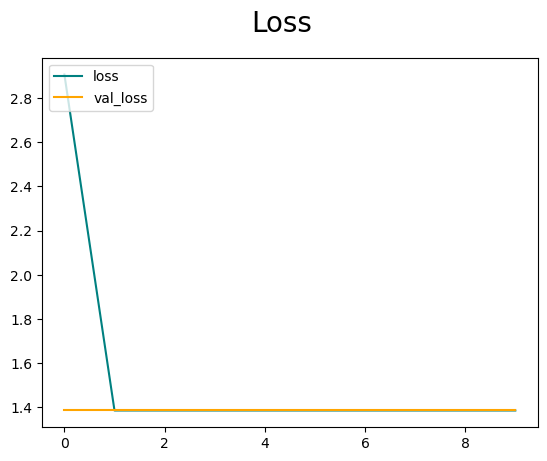

In [93]:
fig = plt.figure()
plt.plot(neural.history['loss'], color='teal', label='loss')
plt.plot(neural.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

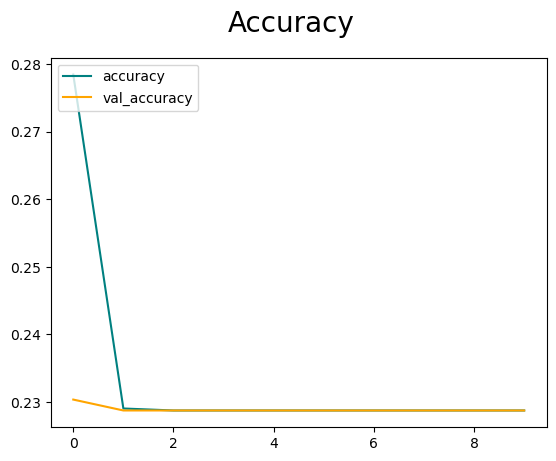

In [94]:
fig = plt.figure()
plt.plot(neural.history['accuracy'], color='teal', label='accuracy')
plt.plot(neural.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

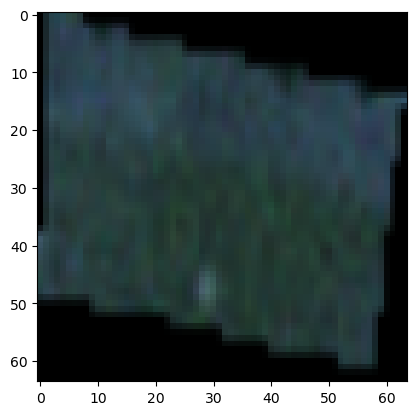

In [95]:
img = cv2.imread('99_2023_0.tif')
resize = tf.image.resize(img, (64,64))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
yhat = model.predict(np.expand_dims(resize/63, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [98]:
# Assuming yhat contains the prediction probabilities for the classes

# Get the predicted class index
predicted_class_index = np.argmax(yhat)

# Define a list of class labels corresponding to your model's output
class_labels = ['Class0', 'Class1', 'Class2', 'Class3']

# Print the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print(f"Predicted Class: {predicted_class_label}")


Predicted Class: Class3


In [ ]:
data_directory = 'prospace_assignment'
images_list = load_tiff_dataset(data_directory)

# Shuffle the dataset
shuffled_images = shuffle(images_list, random_state=42)

# Split the dataset into 10 sub datasets
num_subsets = 25
subset_size = len(shuffled_images) // num_subsets

color_ranges = {
    'green': (50, 150, 50),  # Example green color range (adjust as needed)
    'brown': (150, 75, 0),   # Example brown color range (adjust as needed)
    'white': (220, 220, 220)  # Example white color range (adjust as needed)
}

for i in range(num_subsets):
    subset_start = i * subset_size
    subset_end = (i + 1) * subset_size if i < num_subsets - 1 else len(shuffled_images)
    subset_images = shuffled_images[subset_start:subset_end]

    # Perform clustering on the subset
    num_clusters = 4  # Define the number of clusters
    kmeans = KMeans(n_clusters=num_clusters)
    flattened_images = np.array(subset_images)  # Already flattened in loading function
    cluster_labels = kmeans.fit_predict(flattened_images)

    # Calculate color dominance for each cluster
    dominant_colors = calculate_color_dominance(kmeans.cluster_centers_, color_ranges)

    # Process cluster labels as needed
    # Example: Save cluster labels or do further analysis
    print(f"Subset {i+1} processed. Cluster Labels: {cluster_labels}, Dominant Colors: {dominant_colors}")

In [ ]:
shuffled_images = images_list.shuffle(buffer_size=len(dataset), seed=42)

# Split the dataset into 10 sub datasets
num_subsets = 25
subset_size = len(shuffled_images) // num_subsets

color_ranges = {
    'green': (50, 250, 50),  # Example green color range (adjust as needed)
    'brown': (150, 75, 0),   # Example brown color range (adjust as needed)
    'white': (220, 220, 220)  # Example white color range (adjust as needed)
}
shuffled_dataset = dataset.shuffle(buffer_size=len(dataset), seed=42)
array0, array1, array2, array3 = [], [], [], []

for i in range(num_subsets):
    subset_images = images_list.skip(i * subset_size).take(subset_size)
    flattened_images = np.array([image.numpy().flatten() for image in subset_images])
    num_clusters = 4
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(flattened_images)

for j, label in enumerate(cluster_labels):
    if label == 0:
        array0.append(subset_images[j])
    elif label == 1:
        array1.append(subset_images[j])
    elif label == 2:
        array2.append(subset_images[j])
    elif label == 3:
        array3.append(subset_images[j])
    